# SymPy 1.5 on CoCalc

kernel: Python 3 (system-wide)

https://github.com/sympy/sympy/wiki/Release-Notes-for-1.5

In [1]:
from sympy import *
init_printing(use_latex='mathjax')

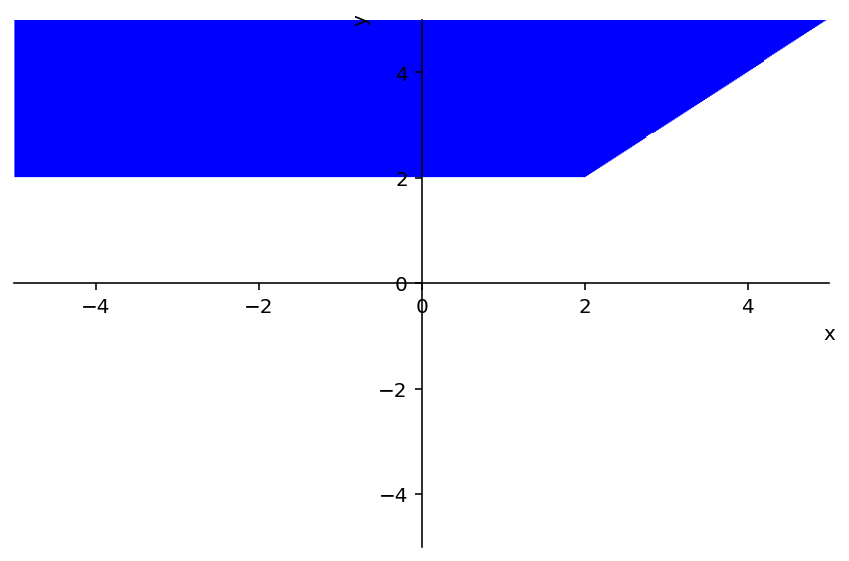

In [2]:
x, y = symbols('x y')
plot_implicit((y > 2) & (y > x), x_var=x, y_var=y)

In [3]:
f2 = sin(x**2)/x * Abs(1- x)
f2

   ⎛ 2⎞        
sin⎝x ⎠⋅│x - 1│
───────────────
       x       

In [4]:
f2d = f2.diff(x)
f2d

                    ⎛            d                 d        ⎞    ⎛ 2⎞         
                    ⎜(re(x) - 1)⋅──(re(x)) + im(x)⋅──(im(x))⎟⋅sin⎝x ⎠⋅sign(x -
     ⎛ 2⎞           ⎝            dx                dx       ⎠                 
2⋅cos⎝x ⎠⋅│x - 1│ + ──────────────────────────────────────────────────────────
                                              x⋅(x - 1)                       
                                                                              

                     
 1)      ⎛ 2⎞        
      sin⎝x ⎠⋅│x - 1│
─── - ───────────────
              2      
             x       

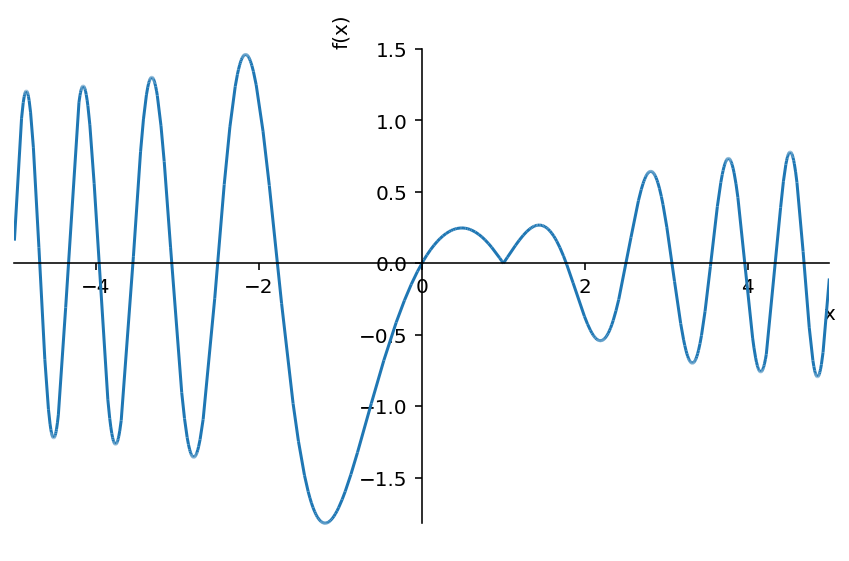

In [5]:
plot(f2, (x, -5, 5))

In [6]:
f3 = li(y*x**2)
f3

  ⎛ 2  ⎞
li⎝x ⋅y⎠

In [7]:
Integral(f3, x).doit()

⎧                 ⎛           3⋅log(y)⎞           
⎪             x⋅Ei⎜3⋅log(x) + ────────⎟           
⎪    ⎛ 2  ⎞       ⎝              2    ⎠           
⎪x⋅li⎝x ⋅y⎠ - ─────────────────────────  for y ≠ 0
⎨                           ____                  
⎪                          ╱  2                   
⎪                     √y⋅╲╱  x                    
⎪                                                 
⎩                  0                     otherwise

In [8]:
solveset(f3, x)

⎧              ⎛ 2  ⎞    ⎫
⎨x | x ∊ ℂ ∧ li⎝x ⋅y⎠ = 0⎬
⎩                        ⎭

## complex 16 in fortran 95

In [9]:
from sympy.utilities.codegen import codegen
import sympy.utilities.codegen
sympy.utilities.codegen.COMPLEX_ALLOWED = True

x = Symbol('x', real=False)
y = Symbol('y', real=True)
result = codegen(('test', x + y), 'f95', 'test', header=False, empty=False)
print(result[0][1])

COMPLEX*16 function test(x, y)
implicit none
COMPLEX*16, intent(in) :: x
REAL*8, intent(in) :: y
test = x + y
end function

